In [35]:
from onebox_utils import *
import pandas  as pd
import matplotlib.pyplot as plt

In [36]:
#set params
obx_folder = r"C:\Users\marty\Desktop\20251113_testing_ecog_g0"
meta_path = r"C:\Users\marty\Desktop\20251113_testing_ecog_g0\20251113_testing_ecog_g0_t0.obx0.obx.meta"
bin_path = r"C:\Users\marty\Desktop\20251113_testing_ecog_g0\20251113_testing_ecog_g0_t0.obx0.obx.bin"
chan_list = [x for x in range(12)]
sr_new = 1000

In [ ]:
#read data
meta = readMeta(Path(bin_path))
sr_obx = SampRate(meta)
raw_data = makeMemMapRaw(Path(bin_path), meta)
#should downsample raw_data as it's already in np.memmap

nChan: 14, nFileSamp: 345790871


In [38]:
downsampled = downsample_memmap_multichannel(data = raw_data, sr_in = int(sr_obx), sr_out = int(sr_new))

Resampling ratio: sr_out/sr_in ≈ 0.03300003
Using rational up=33, down=1000  (error=3.300e-08)
Output samples: 11,411,110
Processing time samples 0 → 5,000,300
Processing time samples 4,999,700 → 10,000,300
Processing time samples 9,999,700 → 15,000,300
Processing time samples 14,999,700 → 20,000,300
Processing time samples 19,999,700 → 25,000,300
Processing time samples 24,999,700 → 30,000,300
Processing time samples 29,999,700 → 35,000,300
Processing time samples 34,999,700 → 40,000,300
Processing time samples 39,999,700 → 45,000,300
Processing time samples 44,999,700 → 50,000,300
Processing time samples 49,999,700 → 55,000,300
Processing time samples 54,999,700 → 60,000,300
Processing time samples 59,999,700 → 65,000,300
Processing time samples 64,999,700 → 70,000,300
Processing time samples 69,999,700 → 75,000,300
Processing time samples 74,999,700 → 80,000,300
Processing time samples 79,999,700 → 85,000,300
Processing time samples 84,999,700 → 90,000,300
Processing time samples 89

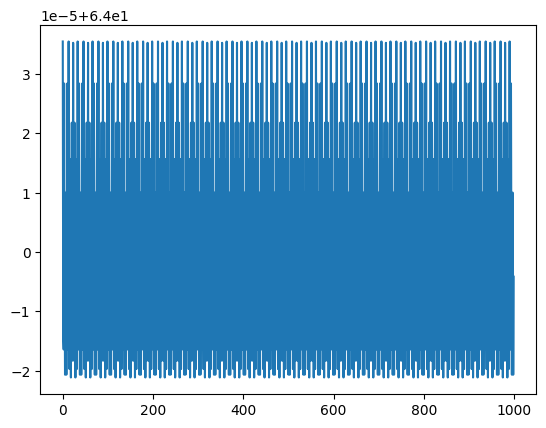

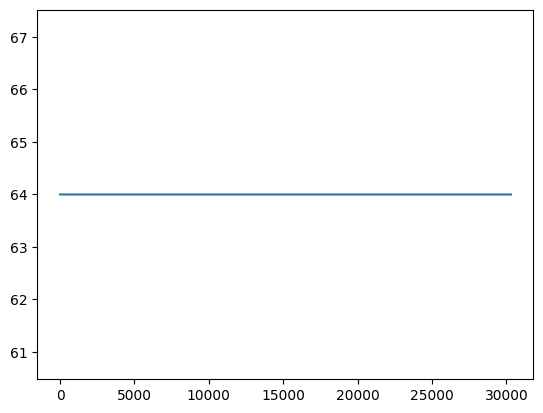

In [39]:
plt.plot(downsampled[-1, 1 * int(sr_new):2 * int(sr_new)])
plt.show()
plt.plot(raw_data[-1, 1 * int(sr_obx):2 * int(sr_obx)])
plt.show()
#looks good!

In [40]:
#gain correct
conv_obx = GainCorrectOBX(downsampled, chan_list, meta)

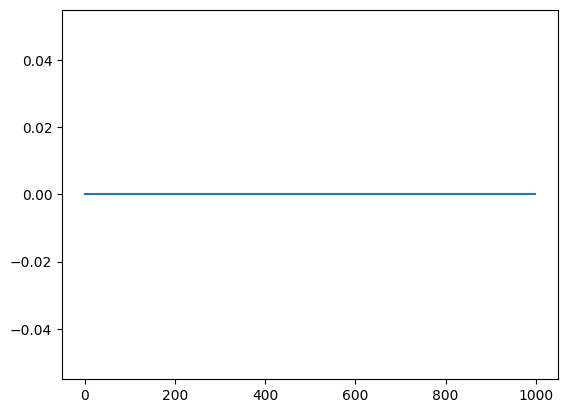

In [41]:
plt.plot(conv_obx[-1, 1 * int(sr_new):2 * int(sr_new)])

In [42]:
#get time
time = np.arange(int(meta['firstSample']), conv_obx.shape[1] + int(meta['firstSample']), 1) / sr_new
timestamps = pd.to_datetime(meta['fileCreateTime']) + pd.to_timedelta(time, unit = 's') #probably no getting around this, np.vectorize with datetime is slower, np.datetime is int only

In [43]:
#print info to troubleshoot
print(f'recording duration: {time[-1] - time[0]} seconds')
print(f'loaded {conv_obx.shape} data points, created time array: {timestamps.shape}')

recording duration: 11411.109 seconds
loaded (14, 11411110) data points, created time array: (11411110,)


In [55]:
#save to csv, get paths
from pathlib import Path
save_folder = Path(r'C:\Users\marty\Projects\scorer\proj_data\raw')
channel_to_box = {0:2,
                  1:4,
                  2:3,
                  3:1}

for i in range(4):
    filename = f'testfile_box{channel_to_box.get(i,'unknown')}.csv'
    save_path = save_folder / filename
    sel_data = conv_obx[i*3:i*3+3, :]
    to_save = pd.DataFrame(sel_data.T, columns = ['f_ecog', 'p_ecog', 'emg'])
    to_save['time'] = timestamps
    to_save.to_csv(save_path, index = False)

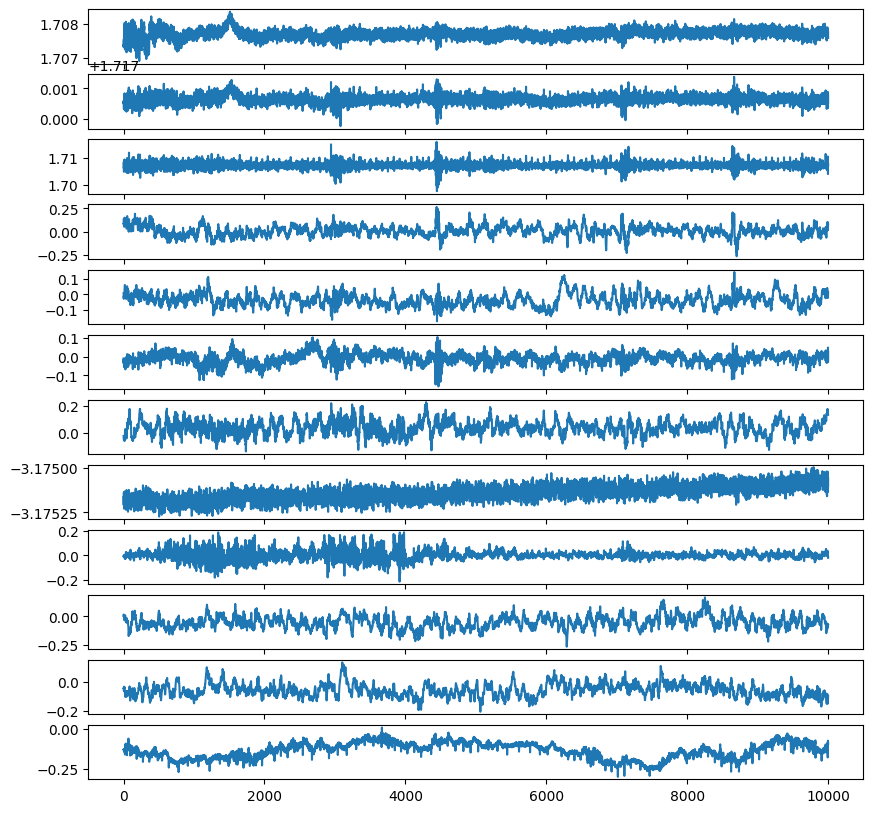

In [ ]:
timestart, timeend = 2000, 2010

fig, axs = plt.subplots(12, 1, figsize = (10,10))
for i, ax in enumerate(axs.flatten()):
    ax.plot(conv_obx[i, int(timestart*sr_new):int(timeend*sr_new)])